# Import libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import json
from unidecode import unidecode
import matplotlib.pyplot as plt

# Fetch the offers to jobmarket

In [2]:
# Request data from API
user = "hacomar@fulp.es"
clave = "Atenas.2023"
base_url = "https://www.jobmarketinsights.com/jmi-api/"
login_url = base_url + "token"

# Log into API

In [3]:
def login():
    # Define the headers to set the Content-Type
    headers = {'Content-Type': 'application/json'}
    # Create a dictionary containing the data to send as JSON
    payload = {'email': user, 'password': clave}
    # Convert the payload to JSON format
    json_payload = json.dumps(payload)
    # Send the POST request with the specified headers and JSON data
    r = requests.post(login_url, data=json_payload, headers=headers)
    # Check if the request was successful (status code 200)
    if r.status_code == 200:
        # Parse the JSON response
        data = r.json()
        token = data["auth"]["token"]
        return token
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
token = login()
print(token)

VGWL3WQ4JB4HGZD7RE6KFXLMPXSCVCG445LVV7M27JMRAQK2S76Q


# Scope

In [4]:
scope_url = base_url + "scopes"
def get_scope(token):
    payload = {'token': token}
    headers = {'Content-Type': 'application/json'}
    json_payload = json.dumps(payload)
    r = requests.post(scope_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
response = get_scope(token)
scopes = response["scopes"][0]["key"]
print(scopes)

792


# Periods

In [5]:
# Ask for list with able periods
periods_url = base_url + "periods"
def get_periods(token):
    payload = {'token': token}
    headers = {'Content-Type': 'application/json'}
    json_payload = json.dumps(payload)
    r = requests.post(periods_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data['periods']
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
# Returns an array of dicts with 4 keys: from, label, to, key
periods = get_periods(token)
print(periods)
# For example, we will use the first period
period = periods[10]
initial_date = period['from']
end_date = period['to']

[{'from': '2023-10-12', 'label': 'Últimos días', 'to': '2023-10-16', 'key': 'ld'}, {'from': '2023-09-01', 'label': 'sep 2023', 'to': '2023-10-01', 'key': '2023-09'}, {'from': '2023-08-01', 'label': 'ago 2023', 'to': '2023-09-01', 'key': '2023-08'}, {'from': '2023-07-01', 'label': 'jul 2023', 'to': '2023-08-01', 'key': '2023-07'}, {'from': '2023-06-01', 'label': 'jun 2023', 'to': '2023-07-01', 'key': '2023-06'}, {'from': '2023-05-01', 'label': 'may 2023', 'to': '2023-06-01', 'key': '2023-05'}, {'from': '2023-04-01', 'label': 'abr 2023', 'to': '2023-05-01', 'key': '2023-04'}, {'from': '2023-03-01', 'label': 'mar 2023', 'to': '2023-04-01', 'key': '2023-03'}, {'from': '2023-02-01', 'label': 'feb 2023', 'to': '2023-03-01', 'key': '2023-02'}, {'from': '2023-01-01', 'label': 'ene 2023', 'to': '2023-02-01', 'key': '2023-01'}, {'from': '2022-12-01', 'label': 'dic 2022', 'to': '2023-01-01', 'key': '2022-12'}, {'from': '2022-11-01', 'label': 'nov 2022', 'to': '2022-12-01', 'key': '2022-11'}, {'fr

# Missing advertisers

In [6]:
missing_adverts_url = base_url + "missingAdvertisers"

def create_payload(token, initial_date, end_date, size=100, offset=0):
    payload = {'strictPeriod': True, 'location': 'ES', 'token': token,"period" : "custom", "customDateFrom": initial_date, "customDateTo": end_date, "offset": offset}
    headers = {'Content-Type': 'application/json'}
    json_payload = json.dumps(payload)
    return json_payload, headers

def get_missing_adverts(token, scope, initial_date, end_date, size=100, offset=0):
    payload, headers = create_payload(token, scope, initial_date, end_date, size, offset)
    json_payload = json.dumps(payload)
    r = requests.post(missing_adverts_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
# print(get_missing_adverts(token, scopes, initial_date, end_date))

# Reports

In [7]:
# reports_url = base_url + "report"
# def get_reports(token, scope, primaryField, initial_date="2020-01-01", final_date="2020-12-31", size=100, offset=0):
#     json_payload, headers = create_payload(token, scope, initial_date, end_date, size, offset)
#     primary_field = {"primaryField" : primaryField}
#     # Add the primaryField to the payload
#     payload = json.loads(json_payload)
#     payload.update(primary_field)
#     json_payload = json.dumps(payload)
#     r = requests.post(reports_url, data=json_payload, headers=headers)
#     if r.status_code == 200:
#         data = r.json()
#         return data
#     else:
#         print(f"Request failed with status code {r.status_code}")
#         return None
# response = get_reports(token, scopes, "location", initial_date, end_date)
# print(response)

# Sites

In [8]:
sites_url = base_url + "sites"
def get_sites(token):
    payload = {'token': token}
    headers = {'Content-Type': 'application/json'}
    json_payload = json.dumps(payload)
    r = requests.post(sites_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
response = get_sites(token)
print(response)

{'total': {'offers': 263256, 'companies': 50982}, 'auth': {'token': 'VGWL3WQ4JB4HGZD7RE6KFXLMPXSCVCG445LVV7M27JMRAQK2S76Q'}, 'sites': [{'offers': 80875, 'companies': 17122, 'label': 'infojobs.net', 'key': '1963'}, {'offers': 40338, 'companies': 3875, 'label': 'es.talent.com', 'key': '4142'}, {'offers': 39185, 'companies': 13518, 'label': 'linkedin.com', 'key': '3455'}, {'offers': 37980, 'companies': 7484, 'label': 'indeed', 'key': '3427'}, {'offers': 20727, 'companies': 9269, 'label': 'jobtoday.com', 'key': '4023'}, {'offers': 14223, 'companies': 5505, 'label': 'glassdoor.com', 'key': '3933'}, {'offers': 11233, 'companies': 1030, 'label': 'empleate.gob.es', 'key': '4058'}, {'offers': 11148, 'companies': 472, 'label': 'iberempleos.es', 'key': '4254'}, {'offers': 10986, 'companies': 380, 'label': 'epreselec.com', 'key': '4186'}, {'offers': 5909, 'companies': 1191, 'label': 'monster.es', 'key': '3464'}, {'offers': 5175, 'companies': 353, 'label': 'infoempleo.com', 'key': '3451'}, {'offers

# Offers

In [9]:
offers_url = base_url + "offers"
def get_offers(token, initial_date, end_date, size=100, offset=0, site=None):
    json_payload, headers = create_payload(token, initial_date, end_date, size, offset)
    # Add the site to the payload
    site = {"site" : "1963"}
    payload = json.loads(json_payload)
    payload.update(site)
    json_payload = json.dumps(payload)
    print(json_payload)
    r = requests.post(offers_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data['offers']
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
initial_date = '2023-10-09'
end_date = '2023-10-12'
response = get_offers(token, initial_date, end_date, size=1, offset=1)
print(response[0])


{"strictPeriod": true, "location": "ES", "token": "VGWL3WQ4JB4HGZD7RE6KFXLMPXSCVCG445LVV7M27JMRAQK2S76Q", "period": "custom", "customDateFrom": "2023-10-09", "customDateTo": "2023-10-12", "offset": 1, "site": "1963"}
{'description': '¡Hola!¡Queremos conocerte!\n\n¿Te apasiona el mundo del comercio? ¿Te preocupas por los detalles? ¿Te consideras una persona dinámica? ¡Te estábamos esperando! \n\nCarrefour es una empresa líder en comercio de alimentación y distribución y queremos que inicies una carrera profesional llena de posibilidades con nuestros mejores profesionales. \n\nPretendemos que todos los días sean un aprendizaje, que crezcas y llegues tan lejos como quieras. Te ofrecemos formación a cargo de la empresa y la posibilidad de promocionar internamente para seguir creciendo con nosotros.\n\n¿Qué buscamos? \n\nCarrefour lo formamos un equipo de personas orientadas al Cliente, siempre con ganas de aprender e innovar en cuanto a la experiencia de compra en nuestras tiendas.\n\nPara

# Offers count

In [10]:
count_url = base_url + "count"
def get_count(token, initial_date, end_date):
    payload = {'token': token, "period" : "custom", "customDateFrom": initial_date, "customDateTo": end_date, "location":"ES|53|GC"}
    headers = {'Content-Type': 'application/json'}
    json_payload = json.dumps(payload)
    r = requests.post(count_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data['offers']['market']
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
def get_all_offers(token, max_offers=1000):
    offers = []
    # for period in periods:
    initial_date = '2023-10-13'
    end_date = '2023-10-15'
    print(f"Period: {initial_date} - {end_date}")
    count = get_count(token, initial_date, end_date)
    print(f"Count: {count}")
    for index in range(0, count, 100):
        if count - index < 100:
            size = count - index
        else:
            size = 100
        response = get_offers(token, initial_date, end_date, size=size, offset=index)
        offers.extend(response)
        if len(offers) >= max_offers:
            return offers
    return offers
offers_news = get_all_offers(token, max_offers=1000)


Period: 2023-10-13 - 2023-10-15
Count: 160
{"strictPeriod": true, "location": "ES", "token": "VGWL3WQ4JB4HGZD7RE6KFXLMPXSCVCG445LVV7M27JMRAQK2S76Q", "period": "custom", "customDateFrom": "2023-10-13", "customDateTo": "2023-10-15", "offset": 0, "site": "1963"}
{"strictPeriod": true, "location": "ES", "token": "VGWL3WQ4JB4HGZD7RE6KFXLMPXSCVCG445LVV7M27JMRAQK2S76Q", "period": "custom", "customDateFrom": "2023-10-13", "customDateTo": "2023-10-15", "offset": 100, "site": "1963"}


In [11]:
def format_offer(offer):
    expected_keys = ['title', 'description', 'company', 'location', 'category']
    expected_keys_post = ['date', 'site', 'id', 'url']
    expected_keys_labeled = ['category', 'site', 'location']
    formated_offer = {}
    for key in expected_keys:
        if key not in offer:
            formated_offer[key] = None
        else:
            if key in expected_keys_labeled:
                formated_offer[key] = offer[key]['label']
            else:
                formated_offer[key] = offer[key]
    post = get_last_record(offer['postings'])
    for key in expected_keys_post:
        if key not in post:
            formated_offer[key] = None
        else:
            if key in expected_keys_labeled:
                formated_offer[key] = post[key]['label']
            else:
                formated_offer[key] = post[key]
    return formated_offer

def get_last_record(postings):
    dates = []
    for post in postings:
        dates.append(post['date'])
    # Get index of the last date
    index = dates.index(max(dates))
    return postings[index]

def format_all_offers(offers):
    formated_offers = []
    for offer in offers:
        formated_offers.append(format_offer(offer))
    return formated_offers

formated_offers = format_all_offers(offers_news)

def set_id_oferta(offer):
    offer['id_oferta'] = offer['id']
    del offer['id']
    return offer

# Set the id_oferta for each offer
formated_offers = list(map(set_id_oferta, formated_offers))

with open("offers.txt",'w') as f:
    for offer in formated_offers:
        f.write(str(offer['description']) + "\n\n##############\n\n")

# Read INFOJOBS_ESTUDIOS dataset

In [12]:
df = pd.read_json("INFOJOBS_ESTUDIOS.json")
# Delete duplicates and register from the column "nivel" with "(Seleccionar)"
df = df[df['nivel'] != "(Seleccionar)"]
expection_list = ["(Seleccionar)", "(regladas)", "(no regladas)", "Grado en", "PCEO", "Teoría de la", "\/"]
def format_denominacion(denominacion):
    for expection in expection_list:
        if expection in denominacion:
            denominacion = denominacion.replace(expection, "")
    return unidecode(denominacion).lower().strip()
df["nivel"] = df["nivel"].apply(format_denominacion)
df["denominacion"] = df["denominacion"].apply(format_denominacion)
niveles_df = pd.read_json("niveles_estudio.json")
niveles_df['denominacion'] = niveles_df['denominacion'].apply(format_denominacion)
# Cast from df to dict key: denominacion, value: nivel
niveles = {}
for denominacion, group in niveles_df.groupby('denominacion'):
    niveles[denominacion] = int(group['id_nivel'].tolist()[0])
# Create a dictionary
titles = {}
for denominacion, group in df.groupby('denominacion'):
    titles[denominacion] = group['nivel'].tolist()

# Custom niveles and titles

In [13]:
# Add custom niveles
# TODO: Las denominaciones y los títulos deben de estar en minúsculas y sin acentos
niveles_additional = ['graduado', 'ciclo formativo', 'grado medio', 'titulacion universitaria', 'degree', 'grado superior', 'licenciado', 'diplomado', 'eso', 'fp', 'grau', 'phd', 'bacherlor', 'formacion profesional']
niveles_medio_list = [niveles['ciclo formativo grado medio'] , niveles['formacion profesional grado medio']]
niveles_superior_list = [niveles['ciclo formativo grado superior'] , niveles['formacion profesional grado superior']]
niveles['grado medio o superior'] = niveles_medio_list + niveles_superior_list
niveles['grado medio'] = niveles_medio_list
niveles['grado superior'] = niveles_superior_list
niveles['licenciado'] = niveles['licenciatura']
niveles['diplomado'] = niveles['diplomatura']
niveles['phd'] = niveles['doctorado']
niveles['eso'] = niveles['educacion secundaria obligatoria']
niveles['fp'] = niveles['formacion profesional grado medio'] + niveles['formacion profesional grado superior']
niveles['grau'] = niveles['grado'] # Grado en italiano
niveles['bachelor'] = niveles['grado'] # Grado en inglés
niveles['formacion profesional'] = niveles['formacion profesional grado medio'] + niveles['formacion profesional grado superior']
niveles['degree'] = niveles['grado'] # Grado en inglés
niveles['titulacion universitaria'] = niveles['grado']
niveles['ciclo formativo'] = niveles_medio_list + niveles_superior_list
niveles['graduado'] = niveles['grado']
niveles['ciclo medio'] = niveles['ciclo formativo grado medio']
niveles['ciclo superior'] = niveles['ciclo formativo grado superior']
niveles['grado en'] = niveles['grado']
niveles['grado universitario'] = niveles['grado']
del niveles['grado']
# TODO: "grado" es ambigua y hay que fijarse en el entorno de la palabra

# Add custom titles
titles['grado medio'] = titles['ciclo formativo grado medio'] + titles['formacion profesional grado medio']
titles['grado superior'] = titles['ciclo formativo grado superior'] + titles['formacion profesional grado superior']
titles['grado medio o superior'] = titles['grado medio'] + titles['grado superior']
titles['licenciado'] = titles['licenciatura']
titles['diplomado'] = titles['diplomatura']
titles['phd'] = titles['doctorado']
titles['eso'] = titles['educacion secundaria obligatoria']
titles['fp'] = titles['grado medio'] + titles['grado superior']
titles['grau'] = titles['grado'] # Grado en italiano
titles['bachelor'] = titles['grado'] # Grado en inglés
titles['formacion profesional'] = titles['grado medio'] + titles['grado superior']
titles['degree'] = titles['grado'] # Grado en inglés
titles['titulacion universitaria'] = titles['grado']
titles['ciclo formativo'] = titles['grado medio'] + titles['grado superior']
titles['graduado'] = titles['grado']
titles['ciclo medio'] = titles['ciclo formativo grado medio']
titles['ciclo superior'] = titles['ciclo formativo grado superior']
titles['grado en'] = titles['grado']
titles['grado universitario'] = titles['grado']
del titles['grado']

In [14]:
niveles

{'bachillerato': 50,
 'ciclo formativo grado medio': 35,
 'ciclo formativo grado superior': 60,
 'diplomatura': 110,
 'doctorado': 150,
 'educacion secundaria obligatoria': 20,
 'ensenanzas artisticas': 23,
 'ensenanzas deportivas': 27,
 'formacion profesional grado medio': 30,
 'formacion profesional grado superior': 55,
 'ingenieria superior': 130,
 'ingenieria tecnica': 120,
 'licenciatura': 140,
 'master': 147,
 'otros cursos y formacion no reglada': 170,
 'otros titulos, certificaciones y carnes': 160,
 'postgrado': 143,
 'sin estudios': 10,
 'grado medio o superior': [35, 30, 60, 55],
 'grado medio': [35, 30],
 'grado superior': [60, 55],
 'licenciado': 140,
 'diplomado': 110,
 'phd': 150,
 'eso': 20,
 'fp': 85,
 'grau': 125,
 'bachelor': 125,
 'formacion profesional': 85,
 'degree': 125,
 'titulacion universitaria': 125,
 'ciclo formativo': [35, 30, 60, 55],
 'graduado': 125,
 'ciclo medio': 35,
 'ciclo superior': 60,
 'grado en': 125,
 'grado universitario': 125}

In [32]:
import re

text = "· Inspecciones presenciales rutinarias e in situ en cada uno de los centros: efectuando diversos controles de ejecución de los trabajos de mantenimiento y otros servicios, nivel de calidad logrado en la prestación de los servicios generales del cliente, mediante procedimientos bien definidos y establecidos por CIAS COM. Estas inspecciones in situ y controles de calidad implican desplazarse hasta los centros del cliente por toda la Ciudad de Barcelona, por lo que se valorará disponer de carnet de conducir (especialmente el de motocicleta, o bien carné B con el que se puede conducir motocicleta)."

search_string = "grado en"
pattern = r'\b' + re.escape(search_string) + r'\b'

if re.search(pattern, text):
    print(f"'{search_string}' found in the text.")
else:
    print(f"'{search_string}' not found in the text.")

'logrado en' found in the text.


# Test search function

In [33]:
def get_niveles(niveles, description):
    obteined_niveles = []
    for nivel in niveles.keys():
        pattern = r'\b' + re.escape(nivel) + r'\b'
        if re.search(pattern, description):
            obteined_niveles.append(nivel)
    return obteined_niveles

def get_titulo(titles, description, obteined_niveles):
    titulo = {}
    for nivel in obteined_niveles:
        if nivel in titles:
            excepted_titles = titles[nivel]
            for title in excepted_titles:
                if title in description:
                    titulo[nivel] = title
    return titulo

def add_nivel_to_offer(niveles, offer):
    numerical_niveles = []
    obteined_niveles = offer['denominacion_nivel']
    for nivel in obteined_niveles:
        if nivel in niveles:
            # Verify nivel is a list
            if isinstance(niveles[nivel], list):
                for n in niveles[nivel]:
                    numerical_niveles.append(n)
            else:
                numerical_niveles.append(niveles[nivel])
    return numerical_niveles

def get_min_and_max_nivel(offer):
    if len(offer['numerical_niveles']) == 1:
        return offer['numerical_niveles'][0], offer['numerical_niveles'][0]
    return min(offer['numerical_niveles']), max(offer['numerical_niveles'])

def verify_grado(titles, description, N=15):
    # Get the index of the word "grado" in the description
    index = description.find("grado")
    # Get the N words before and after the word "grado" in the description
    words = description[index-N:index+N]
    # Verify if the obtained titles are in the words
    for title in titles["grado"]:
        if title in words:
            return True
    return False
        

def normalize_offer(niveles, titles, offer, estrict=False):
    description = unidecode(offer['description']).lower()
    # Verify if the offer description have "Requisitos"
    if estrict:
        if "requisitos" not in description:
            return offer
        # Rewrite the description, from "requisitos" to the end of the description
        description = description[description.find("requisitos"):]
    obteined_niveles = get_niveles(niveles, description)
    if len(obteined_niveles) > 0:
        # if "grado en" in obteined_niveles and verify_grado(titles, description):
        #     # Remove also from obtendied_niveles
        #     obteined_niveles.remove("grado")
        #     if len(obteined_niveles) <= 0:
        #         return offer
        offer['denominacion_nivel'] = obteined_niveles
        offer['numerical_niveles'] = add_nivel_to_offer(niveles, offer)
        offer['min_nivel'], offer['max_nivel'] = get_min_and_max_nivel(offer)
        obteined_titles = get_titulo(titles, description, obteined_niveles)
        if len(obteined_titles) > 0:
            offer['titulo'] = obteined_titles
    return offer


def normalize_to_infojobs_offer(niveles, titles, offers):
    for offer in offers:
        offer = normalize_offer(niveles, titles, offer)
    return offers
offers = normalize_to_infojobs_offer(niveles, titles, formated_offers)

In [34]:
# Get the first offer with "niveles"
for offer in offers:
    if 'denominacion_nivel' in offer:
        if "grado en" in offer['denominacion_nivel']:
            print(offer)
            break

{'title': 'Veterinario Supervisado para Matadero (Varios Centros)', 'description': 'Detalles del empleo\nSalario\n18.978 € al año\nTipo de empleo\nJornada completa\nContrato indefinido\nDescripción completa del empleo\n¿Te has formado como Veterinario/a y te gustaría trabajar en la inspección de mataderos? ¿Tienes disponibilidad para trabajar según cuadrante con flexibilidad horaria?\nEn Grupo EULEN estamos seleccionando un Veterinario/a para la realización de los controles oficiales fundamentalmente en la inspección post-mortem de los animales sacrificados en distintos mataderos de Madrid.\nFunciones:\nInspección post-mortem para garantizar la aplicación de la legislación sobre alimentos y piensos, y de las normas sobre salud y bienestar de los animales, sanidad vegetal y productos fitosanitarios.\nInspección del canal, las vísceras y el faenado en general.\nSeparación de todo aquello que resulte sospechoso y decomiso definitivo bajo la supervisión del veterinario oficial. Esta fase p

In [40]:
# Get the offer with "denominacion_nivel" equal to "grado"
grado_offers = []
for offer in offers:
    if 'denominacion_nivel' in offer:
        if "grado en" in offer['denominacion_nivel']:
            grado_offers.append(offer)
# Save the offers in test.txt
with open("test.txt", 'w') as f:
    for offer in grado_offers:
        f.write(str(offer['description']) + "\n\n##############\n\n")

Total ofertas:  200
Total ofertas encontradas:  41
Porcentaje: 20.50%
{'grado en': 12, 'diplomatura': 11, 'grado superior': 8, 'formacion profesional': 7, 'ciclo formativo': 6, 'grado medio': 5, 'fp': 5, 'grado universitario': 4, 'licenciatura': 3, 'master': 3, 'titulacion universitaria': 2, 'eso': 2, 'postgrado': 2, 'formacion profesional grado superior': 2, 'licenciado': 1, 'graduado': 1, 'diplomado': 0, 'formacion profesional grado medio': 0, 'ingenieria tecnica': 0, 'ciclo formativo grado medio': 0}


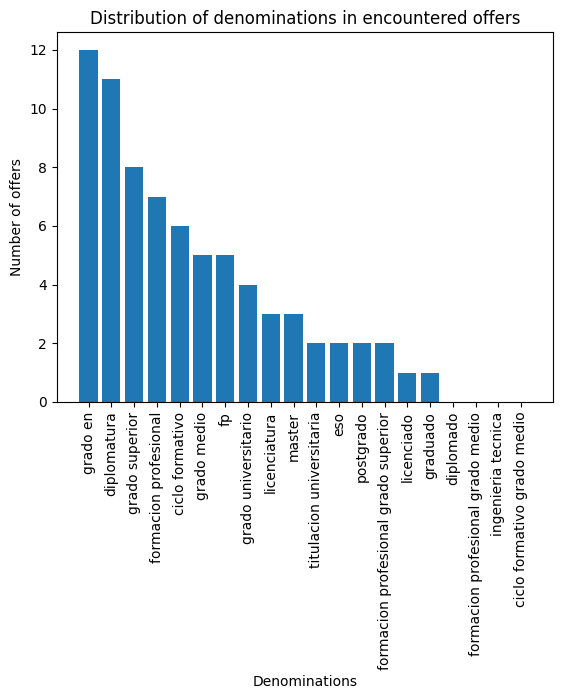

In [36]:
# Get all the offers with "denominacion" and "titulo"
test_offers = [offer for offer in offers if 'titulo' in offer]
print("Total ofertas: ", len(offers))
print("Total ofertas encontradas: ", len(test_offers))
# print the porcentage of offers with "denominacion" and "titulo"
percentage = len(test_offers) / len(offers) * 100
print("Porcentaje: {:.2f}%".format(percentage))
with open("offers.json", 'w') as f:
    json.dump(test_offers, f, indent=4)
# Print how many offers detect in test_offers for each denominacion
obtained_denominations = {}
for offer in test_offers:
    for denomination in offer['denominacion_nivel']:
        if denomination not in obtained_denominations:
            obtained_denominations[denomination] = 0
        else:
            obtained_denominations[denomination] += 1
# Sort by values
obtained_denominations = dict(sorted(obtained_denominations.items(), key=lambda item: item[1], reverse=True))
# And plot the results, in a bar plot
plt.bar(obtained_denominations.keys(), obtained_denominations.values())
plt.title("Distribution of denominations in encountered offers")
plt.xlabel("Denominations")
plt.ylabel("Number of offers")
plt.xticks(rotation=90)
print(obtained_denominations)

# Clasified

In [37]:
# Get the register with "denominacion_nivel"
correct = [offer for offer in test_offers if 'denominacion_nivel' in offer]
# Save the correct offers
with open("correct_offers.json", 'w') as f:
    json.dump(correct, f, indent=4)

# Errors

In [38]:
# Get the registers without "denominacion_nivel"
errors = [offer for offer in offers if 'denominacion_nivel' not in offer]
# Save the first 100 errors as json file
with open("errors.json", 'w') as f:
    json.dump(errors[:100], f, indent=4)

In [39]:
new_offer = """Funciones - Preparar las áreas de trabajo para el servicio. - Transportar útiles y enseres necesarios para el servicio. - Controlar y revisar mercancías y objetos de uso de la sección. - Facturación y cobro a cliente/a (si se da el caso) - Se responsabilizará de que su zona de trabajo esté en perfecto orden y limpieza, así mismo su apariencia debe de ser pulcra y esmerada. - En todo momento tendrá presentes las normas básicas de higiene y manipulación de alimentos. - Preparación del comedor (menaje). - Preparación en cafetería (si aplica) de zumos, infusiones, bebidas refrescantes, etc. y colocación y recolocación en las neveras. - Colocación de menús en bandejas, revisión y distribución. - Camarero/a Barra (tareas servicio de barra). - Limpieza de sala y barra. Se ofrece Contrato: vacaciones del 10 de septiembre al 19 de octubre. Posibilidad de continuidad posterior. Horario Dos días por semana de 8.00 a 16.00 horas. 3 días de tarde de 18.00 a 22.00 horas. Se trabaja de lunes a domingo con 2 días de libranza rotativos. Salario convenio colectividades. - Formación ESO o similar - Experiencia en funciones similares"""
new_offer_output = normalize_offer(niveles, titles, {'description': new_offer})
print(new_offer_output)

{'description': 'Funciones - Preparar las áreas de trabajo para el servicio. - Transportar útiles y enseres necesarios para el servicio. - Controlar y revisar mercancías y objetos de uso de la sección. - Facturación y cobro a cliente/a (si se da el caso) - Se responsabilizará de que su zona de trabajo esté en perfecto orden y limpieza, así mismo su apariencia debe de ser pulcra y esmerada. - En todo momento tendrá presentes las normas básicas de higiene y manipulación de alimentos. - Preparación del comedor (menaje). - Preparación en cafetería (si aplica) de zumos, infusiones, bebidas refrescantes, etc. y colocación y recolocación en las neveras. - Colocación de menús en bandejas, revisión y distribución. - Camarero/a Barra (tareas servicio de barra). - Limpieza de sala y barra. Se ofrece Contrato: vacaciones del 10 de septiembre al 19 de octubre. Posibilidad de continuidad posterior. Horario Dos días por semana de 8.00 a 16.00 horas. 3 días de tarde de 18.00 a 22.00 horas. Se trabaja 